# Exploration 2번쨰

|평가문항|상세기준|
|-------|-------|
|프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|MSE 손실함수값 3000 이하를 달성|
|프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|RMSE 값 150 이하를 달성|
|시각화 요구사항이 정확하게 이루어졌는가?|각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.|

1. 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

(1) 데이터 가져오기  
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.  
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.  

(2) 모델에 입력할 데이터 X 준비하기  
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.  

(3) 모델에 예측할 데이터 y 준비하기  
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.  

(4) train 데이터와 test 데이터로 분리하기  
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요. 

(5) 모델 준비하기  
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.  
모델 함수를 구현해주세요.  

(6) 손실함수 loss 정의하기  
손실함수를 MSE 함수로 정의해주세요.  

(7) 기울기를 구하는 gradient 함수 구현하기  
기울기를 계산하는 gradient 함수를 구현해주세요.  

(8) 하이퍼 파라미터인 학습률 설정하기  
학습률, learning rate 를 설정해주세요  
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.  

(9) 모델 학습하기  
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.  
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.  
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.  

(10) test 데이터에 대한 성능 확인하기  
test 데이터에 대한 성능을 확인해주세요.    

(11) 정답 데이터와 예측한 데이터 시각화하기  
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.  

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns

In [3]:
diabete=sklearn.datasets.load_diabetes()
print(diabete.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
df_X=np.array(diabete.data)
df_Y=np.array(diabete.target)
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
print(df_Y,len(df_Y))

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [6]:
train_x,test_x,train_y,test_y=train_test_split(df_X,df_Y,train_size=0.8)
print(len(train_x),len(test_x),len(train_y),len(test_y))

353 89 353 89


In [7]:
W = np.random.rand(10)
b = np.random.rand()

In [8]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [9]:
dW, db = gradient(train_x, W, b, train_y)
print("dW:", dW)
print("db:", db)

dW: [-0.93190382 -0.26176642 -4.09046706 -2.86150372 -1.88015797 -1.83625884
  2.90900925 -3.21305377 -3.9105821  -2.26892394]
db: -298.50899996664594


In [10]:
LEARNING_RATE = 0.001

losses = []

for i in range(1, 10001):
    dW, db = gradient(train_x, W, b, train_y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(train_x, W, b, train_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 26972.5573
Iteration 20 : Loss 26131.8079
Iteration 30 : Loss 25324.0293
Iteration 40 : Loss 24547.9273
Iteration 50 : Loss 23802.2587
Iteration 60 : Loss 23085.8289
Iteration 70 : Loss 22397.4904
Iteration 80 : Loss 21736.1407
Iteration 90 : Loss 21100.7205
Iteration 100 : Loss 20490.2120
Iteration 110 : Loss 19903.6375
Iteration 120 : Loss 19340.0576
Iteration 130 : Loss 18798.5698
Iteration 140 : Loss 18278.3070
Iteration 150 : Loss 17778.4362
Iteration 160 : Loss 17298.1570
Iteration 170 : Loss 16836.7005
Iteration 180 : Loss 16393.3278
Iteration 190 : Loss 15967.3293
Iteration 200 : Loss 15558.0229
Iteration 210 : Loss 15164.7537
Iteration 220 : Loss 14786.8920
Iteration 230 : Loss 14423.8332
Iteration 240 : Loss 14074.9964
Iteration 250 : Loss 13739.8232
Iteration 260 : Loss 13417.7775
Iteration 270 : Loss 13108.3440
Iteration 280 : Loss 12811.0277
Iteration 290 : Loss 12525.3530
Iteration 300 : Loss 12250.8630
Iteration 310 : Loss 11987.1187
Iteration 320 : L

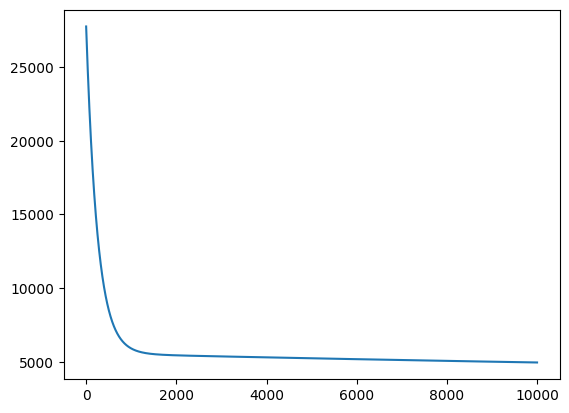

In [11]:
plt.plot(losses)
plt.show()

In [12]:
pred_y=model(test_x,W,b)
MSE(test_y,pred_y)

6598.412564050069

In [13]:
print(test_x[:,0].shape)

(89,)


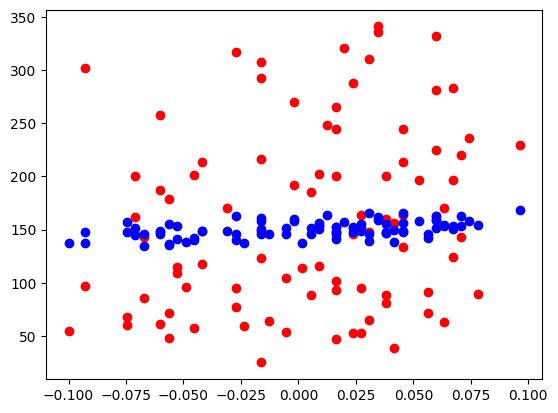

In [14]:
plt.scatter(test_x[:,0],test_y,color="red")
plt.scatter(test_x[:,0],pred_y,color="blue")
plt.show()

2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

(1) 데이터 가져오기  
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.  
여기에서 데이터를 상세히 확인할 수 있습니다.

(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기  
to_datetime 활용 : 링크 참조  
pandas datetime extract year month day 키워드로 검색해 보기  

(3) year, month, day, hour, minute, second 데이터 개수 시각화하기  
sns.countplot 활용해서 시각화하기  
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기  
 
(4) X, y 컬럼 선택 및 train/test 데이터 분리  
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다.  
만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.  
ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

(5) LinearRegression 모델 학습  
sklearn의 LinearRegression 모델 불러오기 및 학습하기

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산  
학습된 모델에 X_test를 입력해서 예측값 출력하기  
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기  
mse 값과 함께 rmse 값도 계산하기

(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기  
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기  
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

In [54]:
data=pd.read_csv('./train.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [55]:
test=pd.read_csv('./test.csv')
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [56]:
data["datetime"]=pd.to_datetime(data.iloc[:,0])
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [57]:
test["datetime"]=pd.to_datetime(data.iloc[:,0])
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-01 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-01 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-01 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-01 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-03-07 14:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-03-07 15:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-03-07 16:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-03-07 17:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [60]:
data['Year'] = data['datetime'].dt.year
data['Month'] = data['datetime'].dt.month
data['Day'] = data['datetime'].dt.day
data['Hour'] = data['datetime'].dt.hour
data['Minute'] = data['datetime'].dt.minute
data['Second'] = data['datetime'].dt.second
data=data.drop(labels=['datetime',"casual","registered"],axis=1)
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Year,Month,Day,Hour,Minute,Second
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0


In [96]:
test['Year'] = test['datetime'].dt.year
test['Month'] = test['datetime'].dt.month
test['Day'] = test['datetime'].dt.day
test['Hour'] = test['datetime'].dt.hour
test['Minute'] = test['datetime'].dt.minute
test['Second'] = test['datetime'].dt.second
test=test.drop(labels=['datetime'],axis=1)
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Minute,Second
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,1,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,1,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,2,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,3,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,3,7,14,0,0
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,3,7,15,0,0
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,3,7,16,0,0
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,3,7,17,0,0


In [61]:
data=data[['Year','Month', 'Day', 'Hour', 'Minute', 'Second', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count']]
data

,Year,Month,Day,Hour,Minute,Second,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,0,0,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011,1,1,1,0,0,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011,1,1,2,0,0,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011,1,1,3,0,0,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011,1,1,4,0,0,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,0,0,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012,12,19,20,0,0,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012,12,19,21,0,0,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012,12,19,22,0,0,4,0,1,1,13.94,17.425,61,6.0032,129


In [100]:
test=test[['Year','Month', 'Day', 'Hour', 'Minute', 'Second', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed']]
test

,Year,Month,Day,Hour,Minute,Second,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,1,0,0,0,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,1,1,0,0,1,0,1,1,10.66,13.635,56,0.0000
2,2011,1,1,2,0,0,1,0,1,1,10.66,13.635,56,0.0000
3,2011,1,1,3,0,0,1,0,1,1,10.66,12.880,56,11.0014
4,2011,1,1,4,0,0,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012,3,7,14,0,0,1,0,1,2,10.66,12.880,60,11.0014
6489,2012,3,7,15,0,0,1,0,1,2,10.66,12.880,60,11.0014
6490,2012,3,7,16,0,0,1,0,1,1,10.66,12.880,60,11.0014
6491,2012,3,7,17,0,0,1,0,1,1,10.66,13.635,56,8.9981


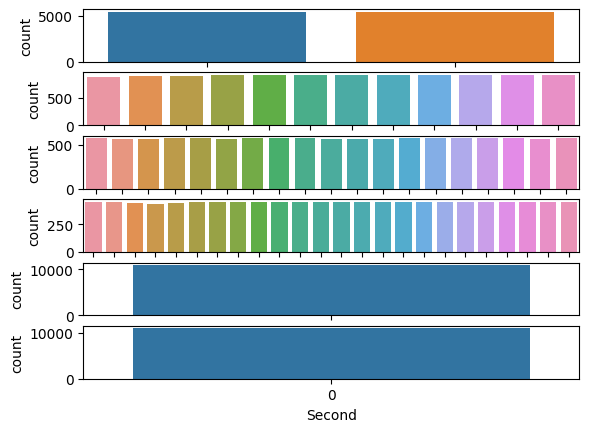

In [101]:
plt.subplot(6,1,1)
sns.countplot(x="Year",data=data)
plt.subplot(6,1,2)
sns.countplot(x="Month",data=data)
plt.subplot(6,1,3)
sns.countplot(x="Day",data=data)
plt.subplot(6,1,4)
sns.countplot(x="Hour",data=data)
plt.subplot(6,1,5)
sns.countplot(x="Minute",data=data)
plt.subplot(6,1,6)
sns.countplot(x="Second",data=data)
plt.show()

In [113]:
train_x,test_x,train_y,test_y=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],train_size=0.8)
print(len(train_x),len(test_x),len(train_y),len(test_y))

8708 2178 8708 2178


In [116]:
model=LinearRegression()
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
print(pred_y)

MSE=mean_squared_error(test_y,pred_y)
print(MSE,np.sqrt(MSE))

[371.75289956 165.81035592  51.50169451 ... 202.5889306  -10.22588426
 133.57207046]
21150.51488323961 145.43216591675863


In [119]:
print(len(test_x.loc[:,"temp"]),len(pred_y))

2178 2178


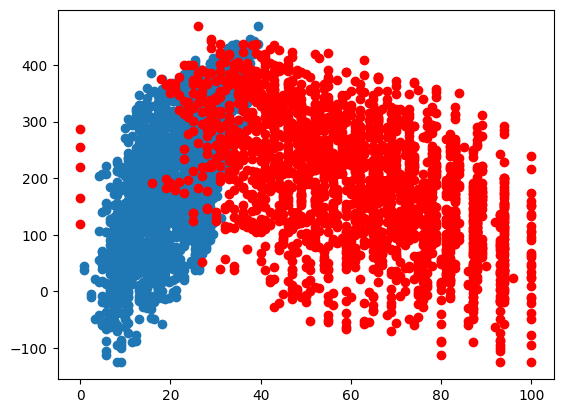

In [123]:
plt.scatter(test_x.loc[:,"temp"],pred_y)
plt.scatter(test_x.loc[:,"humidity"],pred_y,color="red")
plt.show()